In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cell_model_pop_fde_slow_sde import Cell_Population

### simulating example trajectory with geometric brownian noise

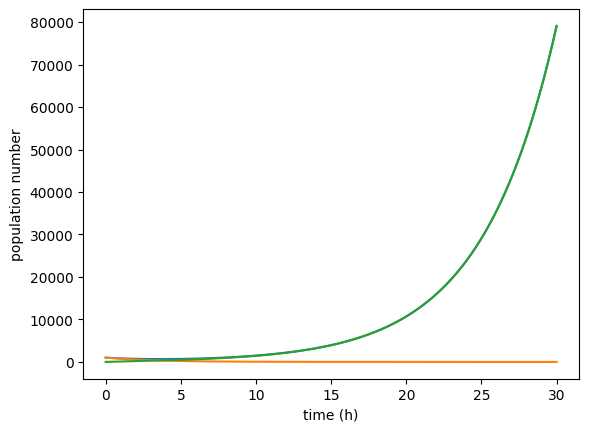

In [3]:
b_max = 1 # NOTE: here actual value is not important, always behaves same as long as b > 0
h = 2**-5
T = 30

mod = Cell_Population(T_final=T, alpha_mem=1.0, sigma=0)
mod.initialize(h=h)

t, tot, sus, res = mod.simulate_population(b_max, delta_t=T)

plt.plot(t,tot)
plt.plot(t, sus)
plt.plot(t, res)
# plt.ylim(900,1050)
plt.xlabel('time (h)')
plt.ylabel('population number')
plt.show()

### simulating in pulsatile environment

In [4]:
alpha_mem=0.6
mod = Cell_Population(T_final=100, alpha_mem=alpha_mem, sigma=0.0)
n_cycles = 3000
h = 2**-12
b_max = 1
b_min = 0

# a = Qa[ind]
# b = Qb[ind]
a = 0.49
b = 0.51

mod.initialize(h=h)
delta_t = mod.time_treat(Qa=0, Qb=b)
t, tot, sus, res = mod.simulate_population(b_max, delta_t)
b_opt = np.ones(len(t))*b_max

delta_pause = mod.time_pause(Qa=a, Qb=b)
delta_treat = mod.time_treat(Qa=a, Qb=b)

for n in range(n_cycles):
    try:
        t2, tot2, sus2, res2 = mod.simulate_population(b_min, delta_pause)
        b_opt = np.concatenate((b_opt,np.zeros(len(t2)-len(t))))

        t, tot, sus, res = mod.simulate_population(b_max, delta_treat)
        b_opt = np.concatenate((b_opt,np.ones(len(t)-len(t2))*b_max))
    except ValueError:
        print('ValueError')
        break


figure,ax = plt.subplots(3,1)
figure.subplots_adjust(hspace=.0)
limits = [0,10]

Q = res / (sus + res)

ax[0].plot(t,Q, color='k')
ax[0].set_ylabel('fraction resistant, $Q$')
ax[0].axhline(y=a, linestyle='--', color='gray')
ax[0].axhline(y=b, linestyle='--', color='gray')
ax[0].set_xlim(limits)
ax[0].set_ylim(0.45,0.55)

b_opt = b_opt[:len(t)]
ax[1].plot(t,b_opt)
ax[1].set_ylabel('antibiotic conc.')
ax[1].set_xlim(limits)

ax[2].plot(t,tot, label='optimal pulsatile (memoryless)')
mod.initialize(h=h)
t, tot, sus, res = mod.simulate_population(b_max, np.max(t))
ax[2].plot(t,tot, label='constant application')
ax[2].set_xlabel('time (h)')
ax[2].set_ylabel('population number')
ax[2].legend()
ax[2].set_xlim(limits)
ax[2].set_ylim(500,1000)
# ax[2].set_gr
plt.show()

In [ ]:
# save the constant application and pulsatile to npy:
np.save(f'const_{alpha_mem}.npy', tot)
np.save(f'pulsatile_{alpha_mem}.npy', tot2)

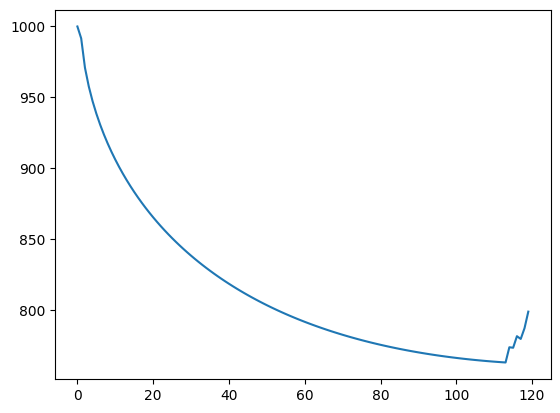

In [ ]:
plt.plot(tot2)

### example use as environment for RL

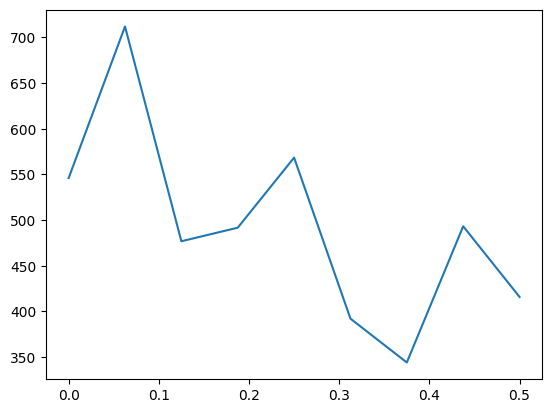

Cost -0.39128393552760343


In [ ]:
mod = Cell_Population(T_final=10, alpha_mem=0.7, sigma=0.2)
mod.initialize(h=2**-4, rand=True)
t, S, N, R, cost = mod.simulate_population(b=1, delta_t=0.5, plot=False)
plt.plot(t, N)
plt.show()
print('Cost', cost)

In [ ]:
t, tot, cost = mod.simulate_population(b=0, delta_t=0.5, plot=False)
plt.plot(t, tot)
plt.show()
print('Cost', cost)

ValueError: too many values to unpack (expected 3)